# Aula 03: Modificação de imagens

Na aula anterior apresentamos maneiras de manipular uma imagem diretamente através da modificação dos pixels que a compõem. Entretanto, uma das coisas que fazem o `openCV` uma ferramenta muito poderosa é a quantidade de algoritmos de manipulação de imagens pela utilização de funções de processamento de sinais.

Nessa aula falaremos de algumas funções úteis para detectar objetos específicos em uma imagem. Apesar de algum conhecimento de processamento de sinais ser útil, tentou-se deixar esta aula a mais completa possível de tal forma que não seja preciso recorrer à nenhuma bibliografia externa.

Nesse notebook devemos apresentar algumas funções de edição de imagem diretamente relacionadas à manipulação de matrizes, notadamente:
1. Função de corte de intensidade
2. Função de suavização de imagem (blur)
3. Detecção de bordas (canny)
4. Detecção de contornos (contour)
5. Correção de luminosidade (gamma correction)
6. Estudo de caso: Efeito Bokeh

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact#, interactive, fixed, interact_manual
import ipywidgets as widgets

## 3.1 - Utilizando a função limiar para segmentação de imagem

Limiarização é um processo de segmentação de imagens que se baseia na diferença dos níveis de cinza que compõe diferentes objetos de uma imagem. A partir de um limiar estabelecido de acordo com as características dos objetos que se quer isolar, a imagem pode ser segmentada em dois grupos: o grupo de pixels com níveis de cinza abaixo do limiar e o grupo de pixels com níveis de cinza acima do limiar. Em uma imagem limiarizada, atribui-se um valor fixo para todos os pixels de mesmo grupo. Teremos dentro do OpenCv uma gama de opções para trabalhar com essas limiarizações. 

A primeira função que precisamos entender é a cv2.threshold() e seus parâmetros. Normalmente convertemos  imagens  em  tons  de  cinza  para  imagens  preto  e  branco  onde  todos  os  pixels possuem 0 ou 255 como valores de intensidade.

Essa função tem como objetivo dividir a imagem, a partir do parâmetro escolhido em valores de 0 e 255, deixando a imagem totalmente negra da numeração do parâmetro escolhido até 0, e deixando a cor branca acima disso, Como mostra a função:

Parâmetros:.threshold(imagem fonte,limiar,tonalidade máxima, tipo de limiarização)
$$
g(x,y) = \begin{cases} 1, & \mbox{se } f(x,y)>T \\ 0, & \mbox{se } f(x,y)\leq T \end{cases}
$$

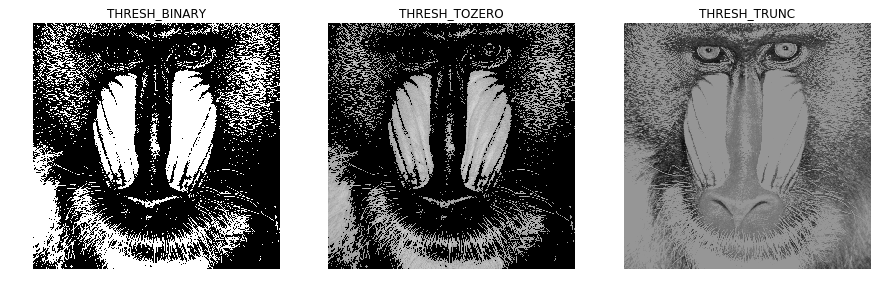

In [2]:
img = cv2.imread('img/baboon.png',0)

fig, ax = plt.subplots(figsize=(15, 15))

_,limiar = cv2.threshold(img,150,255,cv2.THRESH_BINARY)
ax1 = plt.subplot(131)
ax1.axis("off")
ax1.set_title('THRESH_BINARY')
ax1.imshow(cv2.cvtColor(limiar, cv2.COLOR_BGR2RGB))

# Outra função é a cv2.THRESH_TOZERO, que faz com que todos os valores abaixo do limiar vá para 0, ou seja, preto:
_,limiar = cv2.threshold(img,150,255,cv2.THRESH_TOZERO)
ax2 = plt.subplot(132)
ax2.axis("off")
ax2.set_title('THRESH_TOZERO')
ax2.imshow(cv2.cvtColor(limiar, cv2.COLOR_BGR2RGB))

# Outra função é a cv2.THRESH_TRUNC, onde é definido um limite até onde as tonalidades podem ir, como se definíssemos um 'teto' para esses valores:
_,limiar = cv2.threshold(img,150,255,cv2.THRESH_TRUNC)
ax3 = plt.subplot(133)
ax3.axis("off")
ax3.set_title('THRESH_TRUNC')
ax3.imshow(cv2.cvtColor(limiar, cv2.COLOR_BGR2RGB))

É importante salientar que existe, para cada uma dessas funções um comando inverso, basta adicionar `_INV` no final da função. Experimente.

## 3.2 - Suavisando imagem - Utilizando a função blur

Essas funções são úteis quando utilizadas para filtrar uma certa imagem, são usados quatro processos, que dependem da imagem a ser filtrada:

1. Retirando a Media Aritmética(.blur) dos pixels ao redor de uma certa região e substituindo o pixel central pelo valor dessa média, dada como parâmetro da função(tamanho da região);
    
2. Através da Média Gaussiana(.GaussianBlur), também conhecida como distribuição normal;
    
3. Através do valor mediano(.medianBlur), onde os valores dos pixels ao redor de uma certa região são colocados num rol, e o valor mediano é retirado, o pixel central da região é então substituído pelo valor da mediana. Essa função é particularmente efetiva quando usada para filtrar ruídos do tipo Sal e Pimenta;

4. A Filtragem Bilateral(.bilateralFilter) é similar a Média Gaussiana, essa função toma os valores dos pixels numa região, tomando cuidado para pegar apenas valores que são aproximados do valor do pixel central.

Parâmetros:
* `.blur(img, tamanho da região)`
* `.GaussianBlur(imagem, tamanho da região, SigmaX, SigmaY)`
* `.medianBlur(img, tamanho da região)`
* `.bilateralFilter(img, diametro da região, SigmaColor, SigmaSpace)`

Obs: Quando o valor de SigmaColor for muito grande, os pixels mais distantes dentro da região vão ser misturados, resultando numa filtragem fraca.
Quando o valor de SigmaSpace for muito grande, os pixels mais distantes dentro da região serão confundidos se suas cores forem próximas, resultando numa filtragem fraca.
Portanto, é necessário achar um valor de SigmaColor e SigmaSpace apropriado pro tipo de imagem a ser filtrada.

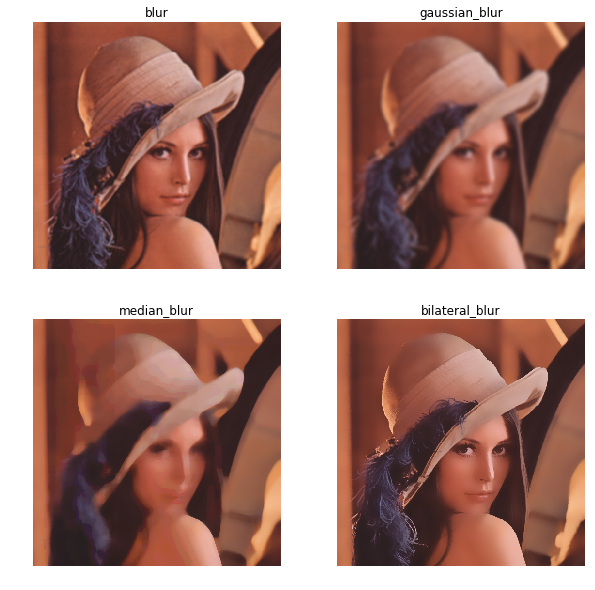

In [3]:
img = cv2.imread('img/lena512.png')

fig, ax = plt.subplots(figsize=(10, 10))

blur = cv2.blur(img,(5,5))
ax1 = plt.subplot(221)
ax1.axis("off")
ax1.set_title('blur')
ax1.imshow(cv2.cvtColor(blur, cv2.COLOR_BGR2RGB))

gaussian_blur = cv2.GaussianBlur(img,(21,21),0)
ax2 = plt.subplot(222)
ax2.axis("off")
ax2.set_title('gaussian_blur')
ax2.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB))

median_blur = cv2.medianBlur(img,21)
ax3 = plt.subplot(223)
ax3.axis("off")
ax3.set_title('median_blur')
ax3.imshow(cv2.cvtColor(median_blur, cv2.COLOR_BGR2RGB))

bilateral_blur = cv2.bilateralFilter(img,25,75,75)
ax4 = plt.subplot(224)
ax4.axis("off")
ax4.set_title('bilateral_blur')
ax4.imshow(cv2.cvtColor(bilateral_blur, cv2.COLOR_BGR2RGB))

## 3.3 - Detecção de bordas utilizando a função Canny

A Função .canny é usada para definir bordas de uma imagem, como as bordas de uma imagem são suscetíveis a ruídos na imagem, pode ser necessário passar a imagem por um dos filtros já vistos. Todos os pixels da imagem são analisados e definidos se são bordas ou não, através de um processo de conexão entre os pixels. 

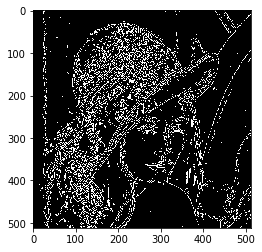

In [4]:
img = cv2.imread('img/lena512.png')

edges = cv2.Canny(img,80,100)

imgRGB = cv2.cvtColor(edges, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

In [5]:
img = cv2.imread("img/lena512.png")
newimg = np.zeros(img.shape, np.uint8)

def plot_funcCanny(canny_max, canny_min):
    newimg = cv2.Canny(img,canny_min,canny_max)

    imgRGB = cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)

interact(plot_funcCanny,
        canny_max=widgets.IntSlider(min=1,max=400,step=1,value=100),
        canny_min=widgets.IntSlider(min=1,max=400,step=1,value=110))

interactive(children=(IntSlider(value=100, description='canny_max', max=400, min=1), IntSlider(value=110, desc…

<function __main__.plot_funcCanny(canny_max, canny_min)>

## 3.4 - Contornos

Podemos delimitar as bordas(ou contorno) de uma imagem através de um processo envolvendo as funções .findContours e .drawContours, além de algumas funções vistas até agora. 

Para encontrar os contornos, primeiro utilizamos .findContours, que obrigatoriamente precisa de duas variaveis: contours e hierarquia. Contours é a definição, de fato, dos contornos da imagem, e hierarquia determina quais contornos terão prioridade sobre outros. Os parâmetros de .findContours são a imagem após passar pela função de threshold, a função de retirada dos contornos(RETR_LIST, RETR_EXTERNAL, RETR_CCOMP, RETR_TREE) e a função que define a aproximação dos contorno(CHAIN_APPROX_NONE, CHAIN_APPROX_SIMPLE)

Para desenhar os contornos, usamos a função .drawContours, cujos paramêtros são a imagem, as matrizes de contornos, quais contornos o usuário deseja mostrar(-1 para mostrar todos ou qualquer número positivo para mostras contornos específicos), a cor das bordas dos contornos e a largura do contorno.


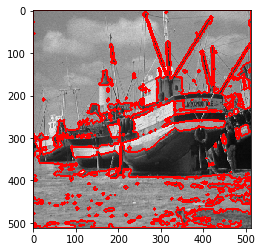

In [6]:
img = cv2.imread('img/boat.png')
blur = cv2.blur(img,(5,5))
imgray = cv2.cvtColor(blur,cv2.COLOR_BGR2GRAY)
ret,threshold = cv2.threshold(imgray,124,255,0)

contours,hier= cv2.findContours(threshold,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(img, contours, -1, (0,0,255), 3)

imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

Acima, a linha "print len(contours)" imprime na tela o tamanho da matriz de contornos, isto é, quantos contornos a função .findContours foi capaz de encontrar na imagem dada a suavização feita pelo blur. Este valor pode ser mudado, mudando o fator de suavização de .blur e serve de parâmetro para uma boa suavização da imagem: uma imagem pobremente suavizada contém centenas de contornos enquanto uma imagem bem suavizada contém apenas os contornos reais.

## 3.5 - Gamma Correction

Correção de gamma também pode ser traduzido como *transformada da lei de potência*. Esse tipo de correção modifica a escala de discretização do sinal, fazendo com que intensidades mais escuras possam ser visualizadas.

<img src="assets/power_law.png"/>

Para corrigir a intensidade de cores, é preciso primeiramente reescalar a imagem que está no range de [0, 255] para o range de [0, 1], de forma que seja possível obter a imagem com a saída corrigida pela função gamma com a aplicação da seguinte equação:

$$
O=I^{\left(\frac{1}{G}\right)}
$$

Onde I é o pixel de entrada (no eixo das abscissas) e G é o pixel como valor da função gamma do pixel de entrada. A saída da função gamma deve novamente ser reescalada para o range de [0, 255].

Valores gamma $G<1$ modificarão a imagem para um espectro mais escuro, enquando valores $G>1$ farão a imagem parecer mais clara. Utilizando $G=1$ na função não afetará a imagem de saída.

fonte: https://www.pyimagesearch.com/2015/10/05/opencv-gamma-correction/

In [7]:
def adjust_gamma(image, gamma=1.0):
    # build a lookup table mapping the pixel values [0, 255] to
    # their adjusted gamma values
    invGamma = 1.0/gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
        for i in np.arange(0, 256)]).astype("uint8")

    # apply gamma correction using the lookup table
    return cv2.LUT(image, table)

In [8]:
img = cv2.imread("img/boat.png")
newimg = np.zeros(img.shape, np.uint8)

def plot_funcGamma(gamma):
    gamma = gamma/100
    newimg = adjust_gamma(img,gamma)

    imgRGB = cv2.cvtColor(newimg, cv2.COLOR_BGR2RGB)
    plt.imshow(imgRGB)

interact(plot_funcGamma,
        gamma=widgets.IntSlider(min=1,max=400,step=1,value=100))

interactive(children=(IntSlider(value=100, description='gamma', max=400, min=1), Output()), _dom_classes=('wid…

<function __main__.plot_funcGamma(gamma)>

## 3.5 - Estudo de Caso

### 3.5.1 - (quasi-) Bokeh Effect

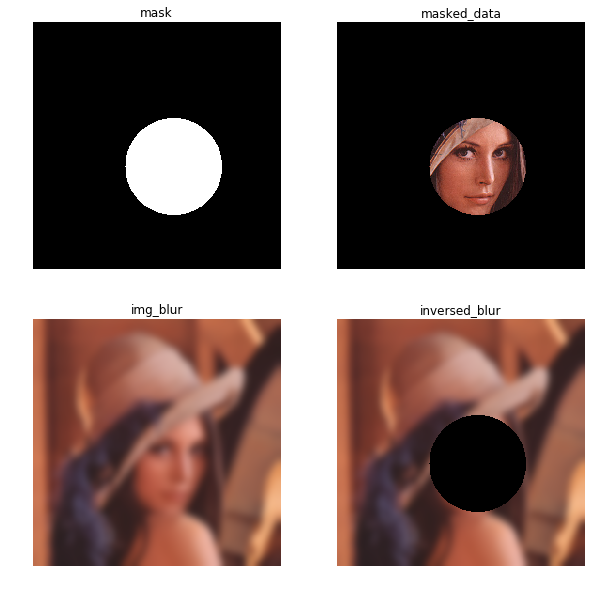

In [9]:
img = cv2.imread('img/lena512.png')
mask = np.zeros(img.shape, np.uint8)

fig, ax = plt.subplots(figsize=(10, 10))

cv2.circle(mask,(290,300), 100, (255,255,255), -1)
ax1 = plt.subplot(221)
ax1.axis("off")
ax1.set_title('mask')
ax1.imshow(cv2.cvtColor(mask, cv2.COLOR_BGR2RGB))

masked_data = cv2.bitwise_and(img, mask)
ax2 = plt.subplot(222)
ax2.axis("off")
ax2.set_title('masked_data')
ax2.imshow(cv2.cvtColor(masked_data, cv2.COLOR_BGR2RGB))

img_blur = cv2.GaussianBlur(img,(51,51),0)
ax3 = plt.subplot(223)
ax3.axis("off")
ax3.set_title('img_blur')
ax3.imshow(cv2.cvtColor(img_blur, cv2.COLOR_BGR2RGB))

inversed_blur = cv2.bitwise_and(img_blur, np.invert(mask))
ax4 = plt.subplot(224)
ax4.axis("off")
ax4.set_title('inversed_blur')
ax4.imshow(cv2.cvtColor(inversed_blur, cv2.COLOR_BGR2RGB))

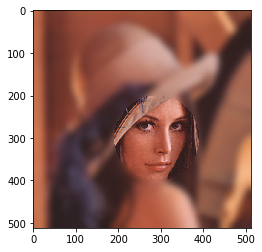

In [10]:
final_img = cv2.bitwise_xor(masked_data, inversed_blur)
imgRGB = cv2.cvtColor(final_img, cv2.COLOR_BGR2RGB)
plt.imshow(imgRGB)

### 3.5.2 - Devaneios

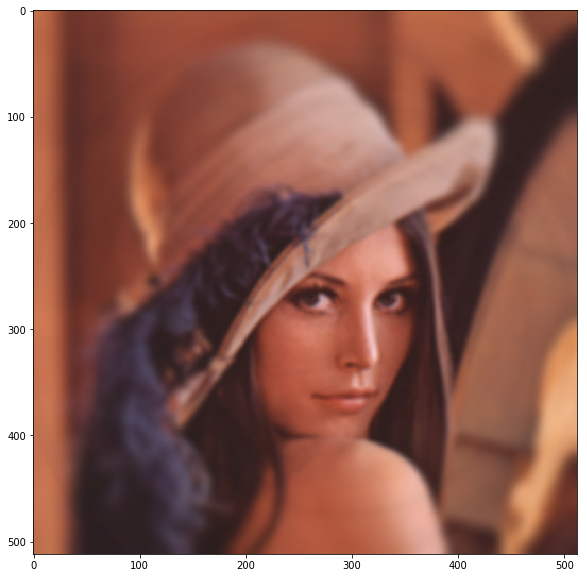

In [11]:
img = cv2.imread('img/lena512.png')

mask = np.zeros(img.shape, np.uint8)
mask1 = np.zeros(img.shape, np.uint8)
mask2 = np.zeros(img.shape, np.uint8)
maska = np.zeros(img.shape, np.uint8)

cv2.circle(mask,(290,300), 50, (254,254,254), -1)
masked_data = cv2.bitwise_and(img, mask)

for i in range(0,255,5):
    if i%2==0:
        img_blur = cv2.GaussianBlur(img,(1+int(i/5),1+int(i/5)),i/35)
#         img_blur = cv2.medianBlur(img,1+int(i/5))
#         img_blur = cv2.bilateralFilter(img,1+int(i/5),i,i)
    
    cv2.circle(mask1,(290,300), 55+i, (254,254,254), -1)
    cv2.circle(maska,(290,300), 50+i, (254,254,254), -1)
    
    mask2 = cv2.bitwise_and(mask1, np.invert(maska))
    mask = cv2.bitwise_xor(mask, mask2)
    
    masked_data2 = cv2.bitwise_and(img_blur, mask2)
    masked_data = cv2.bitwise_xor(masked_data, masked_data2)

cv2.circle(maska,(290,300), 305, (254,254,254), -1)

img_bokeh = cv2.GaussianBlur(img,(53,53),255/35)
# img_blur = cv2.medianBlur(img,11)
# img_blur = cv2.bilateralFilter(img,int(53/5),53,53)

img_bokeh = cv2.bitwise_and(img_bokeh, np.invert(maska))
img_bokeh = cv2.bitwise_xor(img_bokeh, masked_data)

img_bokeh = cv2.blur(img_bokeh,(5,5)) # corrigir circulos criados pelo efeito

fig, ax = plt.subplots(figsize=(10, 10))
imgRGB = cv2.cvtColor(img_bokeh, cv2.COLOR_BGR2RGB)
ax.imshow(imgRGB)

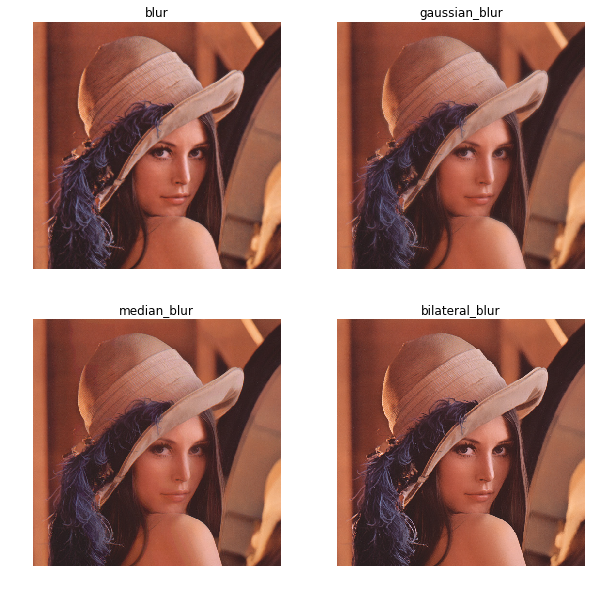

In [12]:
img = cv2.imread('img/lena512.png')

fig, ax = plt.subplots(figsize=(10, 10))

opacity = 0.5

overlay = cv2.blur(img,(5,5))
bg = np.copy(img)
cv2.addWeighted(overlay, opacity, bg, 1 - opacity, 0, bg)
ax1 = plt.subplot(221)
ax1.axis("off")
ax1.set_title('blur')
ax1.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))

overlay = cv2.GaussianBlur(img,(21,21),0)
bg = np.copy(img)
cv2.addWeighted(overlay, opacity, bg, 1 - opacity, 0, bg)
ax2 = plt.subplot(222)
ax2.axis("off")
ax2.set_title('gaussian_blur')
ax2.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))

overlay = cv2.medianBlur(img,21)
bg = np.copy(img)
cv2.addWeighted(overlay, opacity, bg, 1 - opacity, 0, bg)
ax3 = plt.subplot(223)
ax3.axis("off")
ax3.set_title('median_blur')
ax3.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))

overlay = cv2.bilateralFilter(img,25,75,75)
bg = np.copy(img)
cv2.addWeighted(overlay, opacity, bg, 1 - opacity, 0, bg)
ax4 = plt.subplot(224)
ax4.axis("off")
ax4.set_title('bilateral_blur')
ax4.imshow(cv2.cvtColor(bg, cv2.COLOR_BGR2RGB))